In [ ]:
# STOCK PRICE PREDICTION

# Install dependencies
!pip install yfinance scikit-learn matplotlib


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
ticker = "AAPL"
data = yf.download(ticker, start="2020-01-01", end="2024-12-31")

/tmp/ipython-input-1871008474.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2020-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed


In [ ]:
print("Data sample:")
print(data.head())

Data sample:
Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2020-01-02  72.538506  72.598884  71.292296  71.545882  135480400
2020-01-03  71.833313  72.594079  71.608707  71.765690  146322800
2020-01-06  72.405670  72.444313  70.703005  70.954181  118387200
2020-01-07  72.065140  72.671333  71.845362  72.415330  108872000
2020-01-08  73.224388  73.526280  71.768064  71.768064  132079200


In [ ]:

data["Date"] = data.index
data["Date"] = pd.to_datetime(data["Date"])
data["Days"] = (data["Date"] - data["Date"].min()).dt.days

In [ ]:
X = np.array(data["Days"]).reshape(-1, 1)
y = np.array(data["Close"])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 386.43


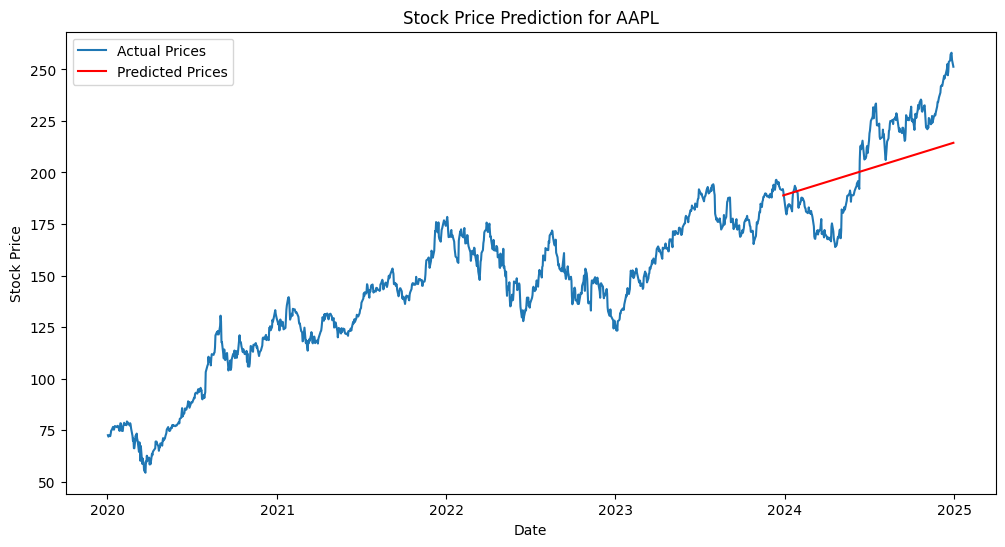

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(data["Date"], y, label="Actual Prices")
plt.plot(data["Date"].iloc[len(X_train):], y_pred, label="Predicted Prices", color="red")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title(f"Stock Price Prediction for {ticker}")
plt.legend()
plt.show()